In [4]:
# Dependencies
import requests
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import api key
from config import api_key

# Import citipy to use latitude and longitude to determine each city
from citipy import citipy

# Specify the range for latitudes and longitudes
lats_range = [-90, 90]
lngs_range = [-180, 180]

In [60]:
# Create a list to hold the latitude/longitudes and a list to hold the cities
lat_lngs = []
cities = []
countries = []

# Randomize a set of 2,000 latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Choose the nearest city to each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is not a repeat, then add it to the list
    if city not in cities:
        cities.append(city)
        
# Check the number of cities retrieved is >500
len(cities)

761

In [62]:
# Create a DataFrame to hold the data, label all the columns, and leave the cells blank except for the "City" column
cities_df = pd.DataFrame()
cities_df["City"] = cities
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness (%)"] = ""
cities_df["Wind Speed (mph)"] = ""
cities_df.head()

,City,Country,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,illoqqortoormiut,,,,,,,,
1,mokhsogollokh,,,,,,,,
2,kesan,,,,,,,,
3,ushuaia,,,,,,,,
4,langsa,,,,,,,,


In [148]:
# Build a query url and change the units from Kelvin to Fahrenheit for temperature
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

# Use .iterrows() to iterate through the rows of the DataFrame
for index, row in cities_df.iterrows():
    city = row["City"]
    weather = requests.get(f"{url}{city}&appid={api_key}&units={units}")
    weather_json = weather.json()
    
    # Extract the data from the JSON to place in the correct columns of the DataFrame
    try:
        print(f"Processing Record for Index {index} | {city}")
        print(f"{url}{city}&appid={api_key}&units={units}")
        cities_df.loc[index, "Country"] = weather_json["sys"]["country"]
        cities_df.loc[index, "Temperature (F)"] = weather_json["main"]["temp"]
        cities_df.loc[index, "Humidity (%)"] = weather_json["main"]["humidity"]
        cities_df.loc[index, "Cloudiness (%)"] = weather_json["clouds"]["all"]
        cities_df.loc[index, "Wind Speed (mph)"]  = weather_json["wind"]["speed"]
        cities_df.loc[index, "Latitude"] = weather_json["coord"]["lat"]
        cities_df.loc[index, "Longitude"] = weather_json["coord"]["lon"]
        cities_df.loc[index, "Date"] = weather_json["dt"]
    
    # Identify cities with missing data by saying "City not found. Skipping..."    
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        print("------------------")

Processing Record for Index 0 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 1 | mokhsogollokh
http://api.openweathermap.org/data/2.5/weather?q=mokhsogollokh&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 2 | kesan
http://api.openweathermap.org/data/2.5/weather?q=kesan&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 3 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 4 | langsa
http://api.openweathermap.org/data/2.5/weather?q=langsa&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 5 | carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=826d4adbccbb3586dc4c

Processing Record for Index 51 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 52 | inverell
http://api.openweathermap.org/data/2.5/weather?q=inverell&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 53 | burica
http://api.openweathermap.org/data/2.5/weather?q=burica&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 54 | vermillion
http://api.openweathermap.org/data/2.5/weather?q=vermillion&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 55 | salinas
http://api.openweathermap.org/data/2.5/weather?q=salinas&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 56 | byron bay
http://api.openweathermap.org/data/2.5/weather?q=byron bay&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Ind

Processing Record for Index 105 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 106 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 107 | shimoda
http://api.openweathermap.org/data/2.5/weather?q=shimoda&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 108 | dikson
http://api.openweathermap.org/data/2.5/weather?q=dikson&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 109 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 110 | belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
--------------

Processing Record for Index 156 | gorontalo
http://api.openweathermap.org/data/2.5/weather?q=gorontalo&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 157 | saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint anthony&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 158 | saint george
http://api.openweathermap.org/data/2.5/weather?q=saint george&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 159 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 160 | nalut
http://api.openweathermap.org/data/2.5/weather?q=nalut&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 161 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?q=zhangjiakou&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 162 | ukiah
http://api

Processing Record for Index 208 | najran
http://api.openweathermap.org/data/2.5/weather?q=najran&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 209 | namatanai
http://api.openweathermap.org/data/2.5/weather?q=namatanai&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 210 | ambanja
http://api.openweathermap.org/data/2.5/weather?q=ambanja&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 211 | embu
http://api.openweathermap.org/data/2.5/weather?q=embu&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 212 | sataua
http://api.openweathermap.org/data/2.5/weather?q=sataua&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 213 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 214 | umzimvubu
h

Processing Record for Index 259 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?q=bambous virieux&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 260 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?q=samalaeulu&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 261 | kijang
http://api.openweathermap.org/data/2.5/weather?q=kijang&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 262 | paita
http://api.openweathermap.org/data/2.5/weather?q=paita&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 263 | sanchor
http://api.openweathermap.org/data/2.5/weather?q=sanchor&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 264 | aosta
http://api.openweathermap.org/data/2.5/weather?q=aosta&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for I

Processing Record for Index 311 | husainabad
http://api.openweathermap.org/data/2.5/weather?q=husainabad&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 312 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 313 | hobyo
http://api.openweathermap.org/data/2.5/weather?q=hobyo&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 314 | upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 315 | borzya
http://api.openweathermap.org/data/2.5/weather?q=borzya&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 316 | bud
http://api.openweathermap.org/data/2.5/weather?q=bud&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 317

Processing Record for Index 364 | te anau
http://api.openweathermap.org/data/2.5/weather?q=te anau&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 365 | camana
http://api.openweathermap.org/data/2.5/weather?q=camana&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 366 | mercedes
http://api.openweathermap.org/data/2.5/weather?q=mercedes&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 367 | picota
http://api.openweathermap.org/data/2.5/weather?q=picota&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 368 | rexburg
http://api.openweathermap.org/data/2.5/weather?q=rexburg&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 369 | narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 370 | washi

Processing Record for Index 417 | gemena
http://api.openweathermap.org/data/2.5/weather?q=gemena&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 418 | aracatuba
http://api.openweathermap.org/data/2.5/weather?q=aracatuba&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 419 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 420 | sainte-marie
http://api.openweathermap.org/data/2.5/weather?q=sainte-marie&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 421 | plouzane
http://api.openweathermap.org/data/2.5/weather?q=plouzane&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 422 | onega
http://api.openweathermap.org/data/2.5/weather?q=onega&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 423 | yatou
http://api.openweathermap.org/data/2.5

Processing Record for Index 469 | nerchinskiy zavod
http://api.openweathermap.org/data/2.5/weather?q=nerchinskiy zavod&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 470 | tokur
http://api.openweathermap.org/data/2.5/weather?q=tokur&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 471 | college
http://api.openweathermap.org/data/2.5/weather?q=college&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 472 | bela
http://api.openweathermap.org/data/2.5/weather?q=bela&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 473 | tingo maria
http://api.openweathermap.org/data/2.5/weather?q=tingo maria&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 474 | hauterive
http://api.openweathermap.org/data/2.5/weather?q=hauterive&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 475 | jalu
http://api.openweathe

Processing Record for Index 521 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 522 | tura
http://api.openweathermap.org/data/2.5/weather?q=tura&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 523 | guarapari
http://api.openweathermap.org/data/2.5/weather?q=guarapari&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 524 | sungaipenuh
http://api.openweathermap.org/data/2.5/weather?q=sungaipenuh&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 525 | fevralsk
http://api.openweathermap.org/data/2.5/weather?q=fevralsk&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
City not found. Skipping...
------------------
Processing Record for Index 526 | harper
http://api.openweathermap.org/data/2.5/weather?q=harper&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for

Processing Record for Index 571 | catumbela
http://api.openweathermap.org/data/2.5/weather?q=catumbela&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 572 | urucara
http://api.openweathermap.org/data/2.5/weather?q=urucara&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 573 | nguru
http://api.openweathermap.org/data/2.5/weather?q=nguru&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 574 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?q=lakes entrance&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 575 | trairi
http://api.openweathermap.org/data/2.5/weather?q=trairi&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 576 | egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 577 | kaohsiung
http://api.openweather

Processing Record for Index 623 | pierre
http://api.openweathermap.org/data/2.5/weather?q=pierre&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 624 | auki
http://api.openweathermap.org/data/2.5/weather?q=auki&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 625 | anito
http://api.openweathermap.org/data/2.5/weather?q=anito&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 626 | jimenez
http://api.openweathermap.org/data/2.5/weather?q=jimenez&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 627 | mahenge
http://api.openweathermap.org/data/2.5/weather?q=mahenge&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 628 | grushevskaya
http://api.openweathermap.org/data/2.5/weather?q=grushevskaya&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 629 | walsrode
http://api.openweathermap.org/data/2.5/we

Processing Record for Index 675 | erenhot
http://api.openweathermap.org/data/2.5/weather?q=erenhot&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 676 | yabelo
http://api.openweathermap.org/data/2.5/weather?q=yabelo&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 677 | ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?q=ust-ilimsk&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 678 | pyshchug
http://api.openweathermap.org/data/2.5/weather?q=pyshchug&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 679 | talara
http://api.openweathermap.org/data/2.5/weather?q=talara&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 680 | mareeba
http://api.openweathermap.org/data/2.5/weather?q=mareeba&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 681 | zhashkiv
http://api.openweathermap.org/data/

Processing Record for Index 727 | baisha
http://api.openweathermap.org/data/2.5/weather?q=baisha&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 728 | severobaykalsk
http://api.openweathermap.org/data/2.5/weather?q=severobaykalsk&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 729 | nuqui
http://api.openweathermap.org/data/2.5/weather?q=nuqui&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 730 | dmanisi
http://api.openweathermap.org/data/2.5/weather?q=dmanisi&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 731 | galle
http://api.openweathermap.org/data/2.5/weather?q=galle&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 732 | ufa
http://api.openweathermap.org/data/2.5/weather?q=ufa&appid=826d4adbccbb3586dc4cd8787c362bb2&units=imperial
Processing Record for Index 733 | kutum
http://api.openweathermap.org/data/2.5/weather

In [149]:
# Adjust for cities not found by dropping those rows and then reset the index counter
cities_final = cities_df[cities_df.Country != ""]
cities_final = cities_final.reset_index().drop(columns={"index"})
cities_final.head()

,City,Country,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mokhsogollokh,RU,1562695967,61.4,128.95,63.16,98,100,2.62
1,ushuaia,AR,1562695967,-54.81,-68.31,36.63,100,90,9.17
2,langsa,ID,1562695967,4.47,97.97,69.28,96,42,1.34
3,carnarvon,ZA,1562695968,-30.97,22.13,55.96,37,0,6.85
4,atuona,PF,1562695968,-9.8,-139.03,80.26,73,26,12.1


In [150]:
# Make sure there are no more empty cells
cities_final.count()

City                684
Country             684
Date                684
Latitude            684
Longitude           684
Temperature (F)     684
Humidity (%)        684
Cloudiness (%)      684
Wind Speed (mph)    684
dtype: int64

In [151]:
# Save the DataFrame as a csv file
cities_final.to_csv("WeatherPy.csv", encoding="utf-8", index=False)

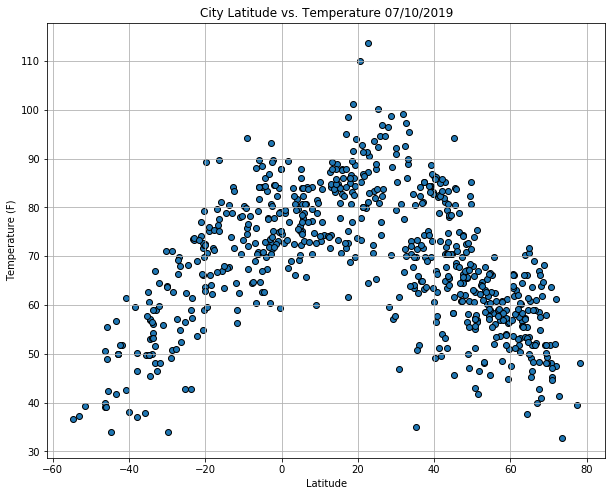

In [182]:
# Plot Latitude vs. Temperature and size the figure, title the chart, label axes, and add gridlines
# Create a variable to hold today's date
today = time.strftime("%m/%d/%Y")
plt.figure(figsize=(10,8))
plt.scatter(cities_final["Latitude"], cities_final["Temperature (F)"], edgecolors="black")
plt.title(f"City Latitude vs. Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("Images/LatvsTemp.png")

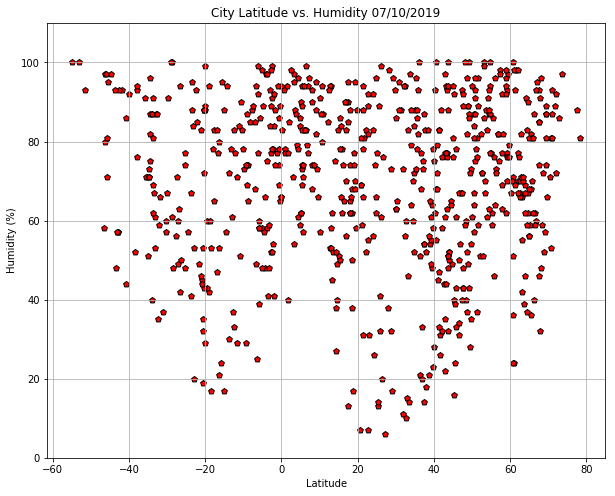

In [183]:
# Plot Latitude vs. Humidity and size the figure, title the chart, label axes, and add gridlines
plt.figure(figsize=(10,8))
plt.scatter(cities_final["Latitude"], cities_final["Humidity (%)"], c="r", marker="p", edgecolors="black")
plt.title(f"City Latitude vs. Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 110)
plt.grid()

# Save the figure
plt.savefig("Images/LatvsHumidity.png")

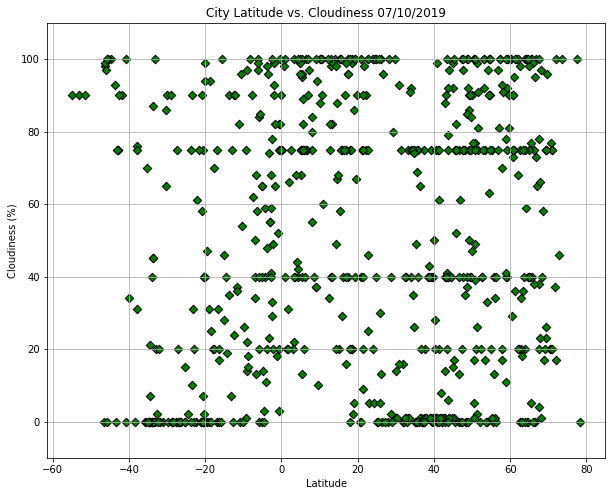

In [184]:
# Plot Latitude vs. Cloudiness and size the figure, title the chart, label axes, and add gridlines
plt.figure(figsize=(10,8))
plt.scatter(cities_final["Latitude"], cities_final["Cloudiness (%)"], c="g", marker="D", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10, 110)
plt.grid()

# Save the figure
plt.savefig("Images/LatvsCloudiness.png")

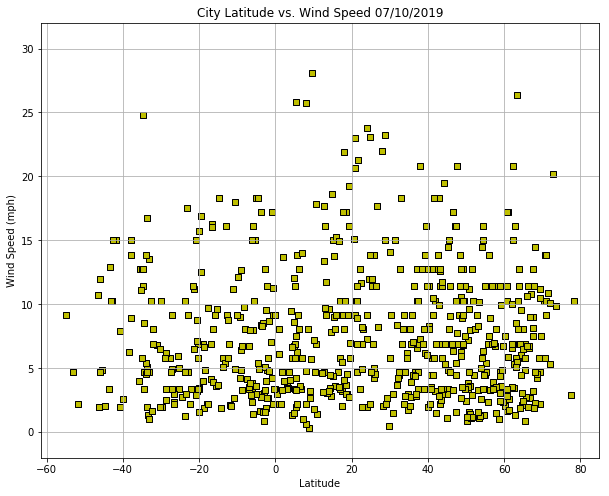

In [181]:
# Plot Latitude vs. Wind Speed and size the figure, title the chart, label axes, and add gridlines
plt.figure(figsize=(10,8))
plt.scatter(cities_final["Latitude"], cities_final["Wind Speed (mph)"], c="y", marker="s", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 32)
plt.grid()

# Save the figure
plt.savefig("Images/LatvsWindSpeed.png")

Analysis

1.	The closer a city is to the equator (Latitude = 0), then the higher the max temperature is for that city based on the cities that were randomly selected in my analysis.
2.	Overall, I would say that latitude does not have a noticeable effect on humidity, cloudiness, or wind speed.  Only temperature seems to be affected by latitude.
3.	I would also say that cities in the Northern Hemisphere (Latitude > 0) generally experience more cloudiness than cities in the Southern Hemisphere (Latitude < 0).
